<a href="https://colab.research.google.com/github/alexandruxtrifon/SMSSpamCollection/blob/main/SMSSpamCollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [77]:
# load the dataset
df = pd.read_csv('SMSSpamCollection', delimiter='\t', header=None, names=['label', 'message'])
# map labels to numerical values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [78]:
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [79]:
# pregatesc datele
X = df['message'].values
y = df['label'].values

In [80]:
# voi utiliza metoda cu tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=100)
print(X)

[[   0    0    0 ...   58 4437  144]
 [   0    0    0 ...  472    6 1940]
 [   0    0    0 ...  660  392 2998]
 ...
 [   0    0    0 ...   23  107  251]
 [   0    0    0 ...  200   12   47]
 [   0    0    0 ...    2   61  268]]


In [81]:
# build and train the neural network
model = Sequential([
    Embedding(input_dim=5000, output_dim=50, input_length=100),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(10, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
#train the model
history = model.fit(X, y, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
140/140 [==============================] - 4s 20ms/step - loss: 0.4960 - accuracy: 0.8360 - val_loss: 0.3334 - val_accuracy: 0.8700
Epoch 2/10
140/140 [==============================] - 2s 16ms/step - loss: 0.2870 - accuracy: 0.8813 - val_loss: 0.1352 - val_accuracy: 0.9677
Epoch 3/10
140/140 [==============================] - 2s 11ms/step - loss: 0.1486 - accuracy: 0.9414 - val_loss: 0.0701 - val_accuracy: 0.9776
Epoch 4/10
140/140 [==============================] - 2s 12ms/step - loss: 0.0968 - accuracy: 0.9650 - val_loss: 0.0545 - val_accuracy: 0.9821
Epoch 5/10
140/140 [==============================] - 2s 13ms/step - loss: 0.0750 - accuracy: 0.9735 - val_loss: 0.0489 - val_accuracy: 0.9848
Epoch 6/10
140/140 [==============================] - 2s 13ms/step - loss: 0.0528 - accuracy: 0.9800 - val_loss: 0.0498 - val_accuracy: 0.9874
Epoch 7/10
140/140 [==============================] - 2s 12ms/step - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0482 - val_accuracy: 0.9848

In [83]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# predictia

y_pred = model.predict(X).ravel()

# calculare scor auc roc

auc_roc = roc_auc_score(y, y_pred)
print(f"AUC ROC Score: {auc_roc}")

# Plot histogram of predicted probabilities
#plt.hist(y_pred, bins=50, edgecolor='k')
#plt.xlabel('Predicted Probability of Spam')
#plt.ylabel('Frequency')
#plt.title('Distribution of Predicted Probabilities')
#plt.show()

175/175 [==============================] - 1s 3ms/step
AUC ROC Score: 0.9989873136761207


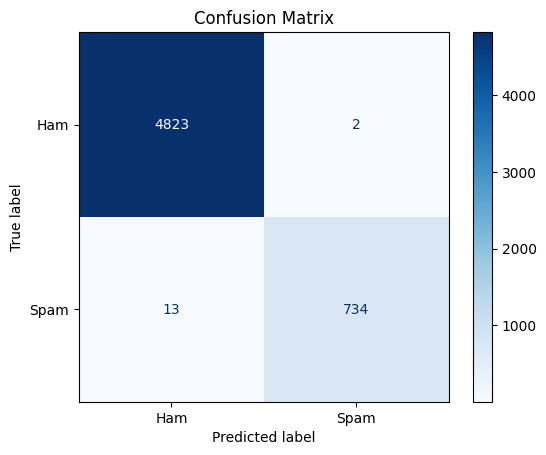

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert probabilities to binary predictions
y_pred_binary = (y_pred >= 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

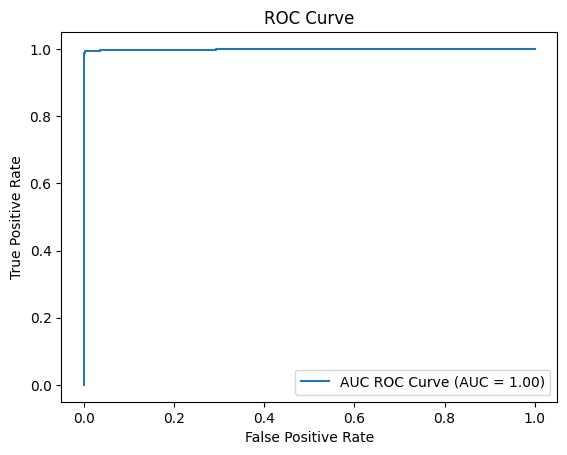

In [85]:
#plot roc curve
fpr, tpr, thresholds = roc_curve(y, y_pred)
plt.plot(fpr, tpr, label=f"AUC ROC Curve (AUC = {auc_roc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

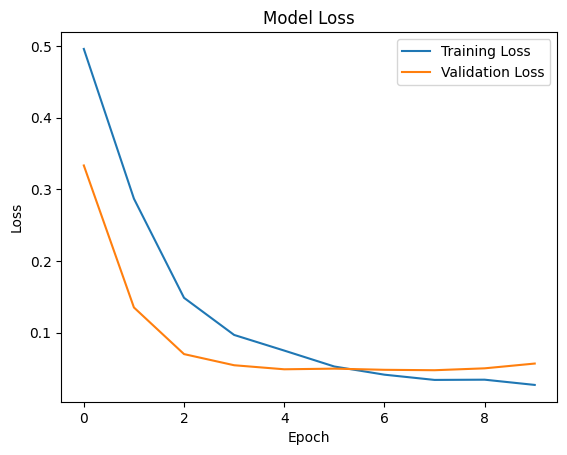

In [86]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

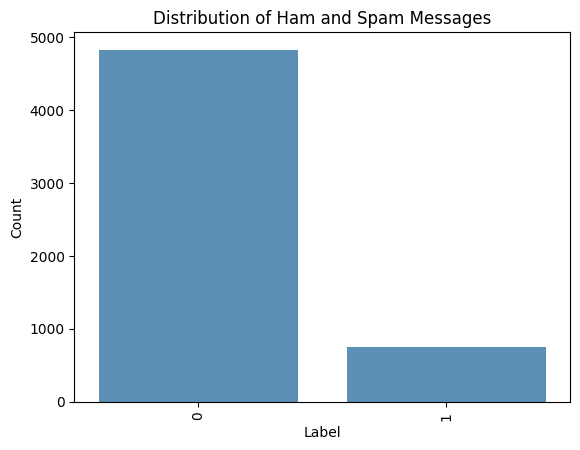

In [87]:
import seaborn as sns
# Plot the distribution of ham and spam
label_counts = df['label'].value_counts()
plt.figure()
label_names = ['Ham', 'Spam']
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8)

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Ham and Spam Messages')
plt.xticks(rotation=90)
plt.show()